In [13]:
import pandas as pd

df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
import numpy as np

np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
mapping = {
     np.unique(df['Species'])[0]: 0,
     np.unique(df['Species'])[1]: 1,
     np.unique(df['Species'])[2]: 2}

df['Species'] = df['Species'].map(mapping)
df.head()

,Id,SepalLength[cm],SepalWidth[cm],PetalLength[cm],PetalWidth[cm],Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [16]:

np.unique(df['Species'])

array([0, 1, 2], dtype=int64)

In [17]:
y = df['Species'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [18]:
X = df.drop(['Species', 'Id'], axis=1).values
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

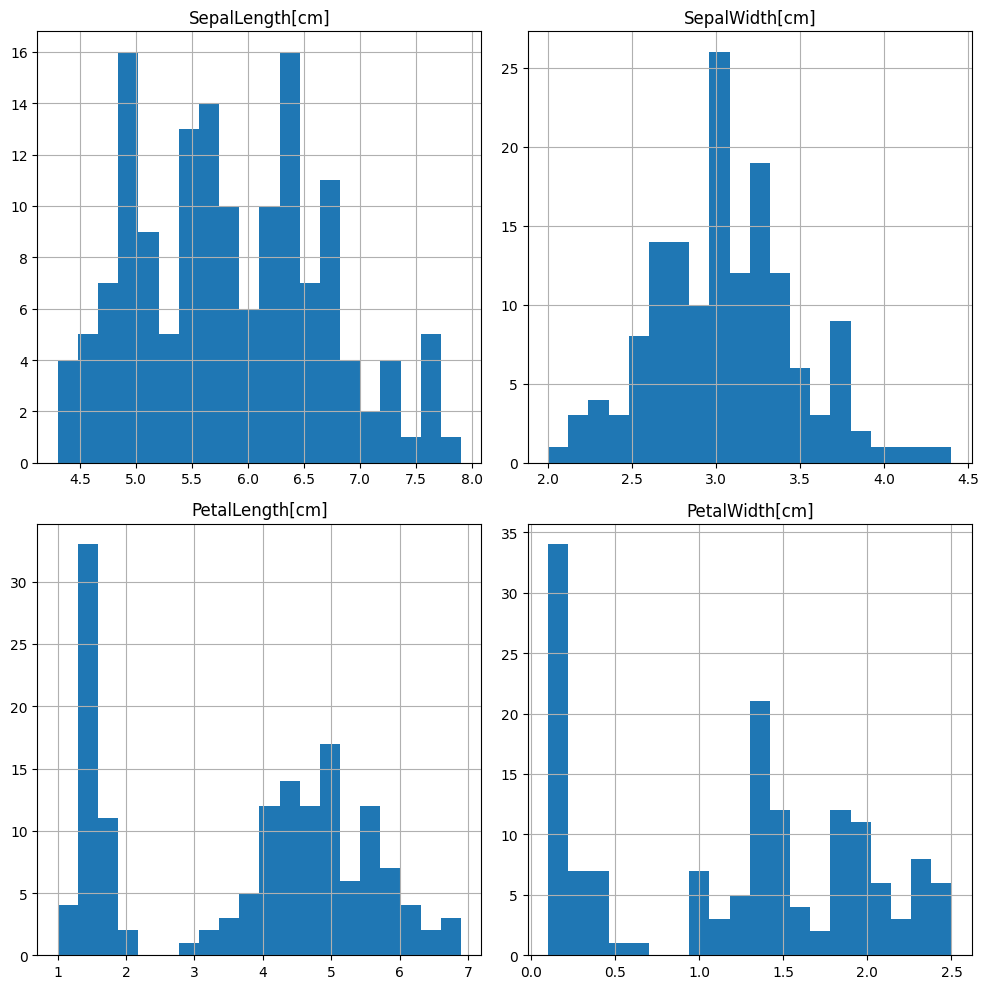

In [19]:
import matplotlib.pyplot as plt

df = df.drop(['Species', 'Id'], axis=1)
df.hist(bins = 20, figsize = (10, 10))
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [27]:
y_train.shape, y_test.shape

((120,), (30,))

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])


In [29]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [30]:
nr_of_samples = 10
pred = pipeline.predict(X_test[:nr_of_samples])
print(f"Predictions: {pred} | True labels: {y_test[:nr_of_samples]}")



Predictions: [1 0 2 1 1 0 1 2 1 1] | True labels: [1 0 2 1 1 0 1 2 1 1]


In [31]:
acurracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {acurracy}")

Accuracy: 1.0


In [36]:
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline(
    [('scaler', StandardScaler()),
     ('mlp', MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000))
    ])



In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000))])

In [38]:
predictions = pipeline.predict(X_test)
acurracy = pipeline.score(X_test, y_test)

In [39]:
acurracy

1.0